In [21]:
import pandas as pd
import numpy as np
import seaborn as sns

In [22]:
from omegaconf import OmegaConf

import hydra

config = OmegaConf.load("conf/config.yaml")
current_dataset = config.mts_running_dataset
mts_current_metric_for_optimization = 'AUC_PR'
current_dataset, mts_current_metric_for_optimization

('settings_five', 'AUC_PR')

In [23]:
from utils.config import multivariate_detector_names

detector_names = multivariate_detector_names
detector_names

['CBLOF',
 'RobustPCA',
 'COPOD',
 'HBOS',
 'LOF',
 'PCC',
 'Torsk',
 'Random Black Forest (RR)',
 'AutoEncoder (AE)',
 'DenoisingAutoEncoder (DAE)']

In [24]:
combine_df = pd.read_csv(f'results_mts/label_by_{mts_current_metric_for_optimization}/combine_detectors/settings_five/merged_combine_detectors_results.csv')
combine_df

,Unnamed: 0,AUC_PR,VUS_PR,INTERPRETABILITY_HIT_2_SCORE,weight_CBLOF,weight_RobustPCA,weight_COPOD,weight_HBOS,weight_LOF,weight_PCC,weight_Torsk,weight_Random Black Forest (RR),weight_AutoEncoder (AE),weight_DenoisingAutoEncoder (DAE),dataset,filename,Model Selector,Combine Method,k
0,0,0.417097,0.457353,0.543645,0.0,0.0,0.093909,0.0,0.394670,0.428934,0.0,0.0,0.000000,0.082487,settings_five,synthetic_batch_41.out,knn_16,average,4
1,1,0.425683,0.492308,0.454238,0.0,0.0,0.093367,0.0,0.391213,0.428813,0.0,0.0,0.000000,0.086608,settings_five,synthetic_batch_462.out,knn_16,average,4
2,2,0.242443,0.411787,0.341418,0.0,0.0,0.096581,0.0,0.407692,0.402137,0.0,0.0,0.000000,0.093590,settings_five,synthetic_batch_522.out,knn_16,average,4
3,3,0.724165,0.933389,0.897436,0.0,0.0,0.097997,0.0,0.397103,0.404772,0.0,0.0,0.000000,0.100128,settings_five,synthetic_batch_101.out,knn_16,average,4
4,4,0.002995,0.016775,0.550000,0.0,0.0,0.000000,0.0,0.430213,0.388936,0.0,0.0,0.091915,0.088936,settings_five,synthetic_batch_676.out,knn_16,average,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216955,216955,0.048289,0.108325,0.000000,-0.0,-0.0,-0.000000,-0.0,-0.000000,0.254343,-0.0,-0.0,0.745657,-0.000000,settings_five,synthetic_batch_18.out,rocket_32,average,2
216956,216956,0.387964,0.419252,0.348998,-0.0,-0.0,-0.000000,-0.0,-0.000000,0.099510,-0.0,-0.0,0.900490,-0.000000,settings_five,synthetic_batch_232.out,rocket_32,average,2
216957,216957,0.476924,0.514206,0.499410,-0.0,-0.0,-0.000000,-0.0,-0.000000,0.069651,-0.0,-0.0,-0.000000,0.930349,settings_five,synthetic_batch_681.out,rocket_32,average,2
216958,216958,0.206385,0.298312,0.489796,-0.0,-0.0,-0.000000,-0.0,-0.000000,0.070223,-0.0,-0.0,0.929777,-0.000000,settings_five,synthetic_batch_604.out,rocket_32,average,2


In [25]:
model_selection_cfgs = combine_df[['Model Selector', 'Combine Method', 'k']].value_counts().to_frame(name='Counts').reset_index()
model_selection_cfgs

,Model Selector,Combine Method,k,Counts
0,ada_boost_128,average,1,339
1,ada_boost_128,average,2,339
2,rocket_256,vote,3,339
3,rocket_256,vote,4,339
4,rocket_32,average,1,339
...,...,...,...,...
635,knn_16,vote,3,339
636,knn_16,vote,4,339
637,knn_256,average,1,339
638,knn_256,average,2,339


In [26]:
combine_df['filename'].unique()

array(['synthetic_batch_41.out', 'synthetic_batch_462.out',
       'synthetic_batch_522.out', 'synthetic_batch_101.out',
       'synthetic_batch_676.out', 'synthetic_batch_642.out',
       'synthetic_batch_450.out', 'synthetic_batch_325.out',
       'synthetic_batch_373.out', 'synthetic_batch_69.out',
       'synthetic_batch_697.out', 'synthetic_batch_229.out',
       'synthetic_batch_568.out', 'synthetic_batch_487.out',
       'synthetic_batch_40.out', 'synthetic_batch_289.out',
       'synthetic_batch_346.out', 'synthetic_batch_242.out',
       'synthetic_batch_609.out', 'synthetic_batch_90.out',
       'synthetic_batch_664.out', 'synthetic_batch_429.out',
       'synthetic_batch_493.out', 'synthetic_batch_476.out',
       'synthetic_batch_313.out', 'synthetic_batch_342.out',
       'synthetic_batch_625.out', 'synthetic_batch_91.out',
       'synthetic_batch_113.out', 'synthetic_batch_386.out',
       'synthetic_batch_199.out', 'synthetic_batch_179.out',
       'synthetic_batch_614.o

In [27]:
# auc_pf_dfs = pd.DataFrame()
# auc_pf_dfs['filename'] = df['filename'].unique()
# auc_pf_dfs['dataset'] = df['dataset'].unique()[0]
# auc_pf_dfs.set_index(['dataset', 'filename'], inplace=True)
auc_pf_dfs = []
for row in model_selection_cfgs.itertuples():
    # print(f'Model Selector: {row[1]}, Combine Method: {row[2]}, k: {row[3]} -> Counts: {row[4]}')
    single_df = combine_df[(combine_df['Model Selector'] == row[1]) & (combine_df['Combine Method'] == row[2]) & (combine_df['k'] == row[3])]
    # print(single_df.shape)
    single_df = single_df[['dataset', 'filename', 'AUC_PR', 'VUS_PR','INTERPRETABILITY_HIT_2_SCORE']]
    # single_df.set_index(['dataset', 'filename'], inplace=True)
    single_df['Model'] = f'{row[1]}_{row[2]}_{row[3]}'
    # single_df.rename(columns={'AUC_PR': f'{row[1]}_{row[2]}_{row[3]}'}, inplace=True)
    
    auc_pf_dfs.append(single_df)
auc_pf_dfs = pd.concat(auc_pf_dfs, axis=0, ignore_index=True)
# auc_pf_dfs.reset_index(inplace=True)
auc_pf_dfs.shape
# sns.boxplot(data=single_df, x='Dataset', y='AUC_PR', hue='Detector')

(216960, 6)

In [28]:
auc_pf_dfs.head()

,dataset,filename,AUC_PR,VUS_PR,INTERPRETABILITY_HIT_2_SCORE,Model
0,settings_five,synthetic_batch_41.out,0.423305,0.435542,0.381317,ada_boost_128_average_1
1,settings_five,synthetic_batch_462.out,0.405888,0.464653,0.231572,ada_boost_128_average_1
2,settings_five,synthetic_batch_522.out,0.208660,0.369771,0.111940,ada_boost_128_average_1
3,settings_five,synthetic_batch_101.out,0.682163,0.740540,0.897436,ada_boost_128_average_1
4,settings_five,synthetic_batch_676.out,0.002593,0.019009,0.650000,ada_boost_128_average_1


In [29]:
combined_detector_methods = auc_pf_dfs['Model'].unique().tolist()
print('Combined detector methods:', combined_detector_methods[:10])

Combined detector methods: ['ada_boost_128_average_1', 'ada_boost_128_average_2', 'rocket_256_vote_3', 'rocket_256_vote_4', 'rocket_32_average_1', 'rocket_32_average_2', 'rocket_32_average_3', 'rocket_32_average_4', 'rocket_32_vote_1', 'rocket_32_vote_2']


In [30]:
# Replace this value with "AUC_PR" or "VUS_PR" to obtain the corresponding results
# measure_name = 'VUS_PR'
measure_names = ['AUC_PR', 'VUS_PR', 'INTERPRETABILITY_HIT_2_SCORE']
base_lines = ['Oracle', 'Avg Ens', 'Oracle_new']

# ['INTERPRETABILITY_HIT_2_SCORE', 'INTERPRETABILITY_LOG_SCORE']

# Uncomment this command and all plt.savefig(...) commands to save the generated figures
# figure_path = 'dummy/path/{}.svg'
df_dict = dict()
original_model_selectors_dfs_dict = dict()
# new_columns = dict()
for measure_name in measure_names:
    df = pd.read_csv(f'results_mts/label_by_{mts_current_metric_for_optimization}/merged_scores/settings_five/current_accuracy_{measure_name}.csv')
    df_dict[measure_name] = df
    score_columns = [c for c in df.columns if c.endswith('_score')]
    new_columns = {c: c[:-6] for c in score_columns}
    # print(new_columns)
    # print(score_columns)
    df.rename(new_columns, axis=1, inplace=True)
    # df.columns = df.columns.str[:-5]
    # print(df.columns)
    if 'Unnamed: 0' in df.columns:
        df = df.drop(labels='Unnamed: 0', axis=1)
    # base_df = base_df[['dataset', 'filename', 'Oracle', 'Avg Ens']]
    # df = pd.merge(df, auc_pf_dfs, on=['dataset', 'filename'], how='left')
    print(f'Load {measure_name} combined results with shape {df.shape}')
    
    original_model_selectors_dfs = []
    for key, original_c in new_columns.items():
        # print(original_c)
        selected_df = df[['dataset', 'filename', original_c]]
        selected_df.rename(columns={original_c: measure_name}, inplace=True)
        selected_df['Model'] = original_c
        
        original_model_selectors_dfs.append(selected_df)
    for detector in detector_names:
        selected_df = df[['dataset', 'filename', detector]]
        selected_df.rename(columns={detector: measure_name}, inplace=True)
        selected_df['Model'] = detector
        original_model_selectors_dfs.append(selected_df)
    for detector in base_lines:
        selected_df = df[['dataset', 'filename', detector]]
        selected_df.rename(columns={detector: measure_name}, inplace=True)
        selected_df['Model'] = detector
        original_model_selectors_dfs.append(selected_df)
    original_model_selectors_dfs = pd.concat(original_model_selectors_dfs, axis=0, ignore_index=True)
    print(f'Original model selectors df for {measure_name} shape:', original_model_selectors_dfs.shape)
    original_model_selectors_dfs_dict[measure_name] = original_model_selectors_dfs

# df = pd.read_csv(f'results_mts/merged_scores/settings_five/current_accuracy_{measure_name}.csv')
from functools import reduce
original_model_selectors_dfs = reduce(lambda x, y: pd.merge(x, y, on = ['dataset', 'filename', 'Model']), original_model_selectors_dfs_dict.values())
original_model_selectors_dfs

# df = pd.merge(df, df_vote, on=['dataset', 'filename'], how='left')

Load AUC_PR combined results with shape (339, 176)
Original model selectors df for AUC_PR shape: (31527, 4)
Load VUS_PR combined results with shape (339, 176)
Original model selectors df for VUS_PR shape: (31527, 4)
Load INTERPRETABILITY_HIT_2_SCORE combined results with shape (339, 176)
Original model selectors df for INTERPRETABILITY_HIT_2_SCORE shape: (31527, 4)


/var/folders/5j/s9hphkqj409f3hqysls2hfzh0000gn/T/ipykernel_825/3612829392.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df.rename(columns={original_c: measure_name}, inplace=True)
/var/folders/5j/s9hphkqj409f3hqysls2hfzh0000gn/T/ipykernel_825/3612829392.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_df['Model'] = original_c
/var/folders/5j/s9hphkqj409f3hqysls2hfzh0000gn/T/ipykernel_825/3612829392.py:33: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: h

,dataset,filename,AUC_PR,Model,VUS_PR,INTERPRETABILITY_HIT_2_SCORE
0,settings_five,synthetic_batch_1.out,0.394699,ada_boost_16,0.538688,0.311806
1,settings_five,synthetic_batch_10.out,0.378228,ada_boost_16,0.599976,0.764368
2,settings_five,synthetic_batch_100.out,0.441310,ada_boost_16,0.243145,0.695652
3,settings_five,synthetic_batch_101.out,0.682163,ada_boost_16,0.740540,0.897436
4,settings_five,synthetic_batch_103.out,0.358341,ada_boost_16,0.657116,0.764706
...,...,...,...,...,...,...
31522,settings_five,synthetic_batch_85.out,0.477173,Oracle_new,0.512044,0.652174
31523,settings_five,synthetic_batch_90.out,0.581681,Oracle_new,0.793246,0.779570
31524,settings_five,synthetic_batch_91.out,0.116710,Oracle_new,0.193892,0.685185
31525,settings_five,synthetic_batch_98.out,0.580879,Oracle_new,0.778462,0.795918


In [31]:
# df = df_dict[measure_name]
# df

In [32]:
original_model_selectors_dfs

,dataset,filename,AUC_PR,Model,VUS_PR,INTERPRETABILITY_HIT_2_SCORE
0,settings_five,synthetic_batch_1.out,0.394699,ada_boost_16,0.538688,0.311806
1,settings_five,synthetic_batch_10.out,0.378228,ada_boost_16,0.599976,0.764368
2,settings_five,synthetic_batch_100.out,0.441310,ada_boost_16,0.243145,0.695652
3,settings_five,synthetic_batch_101.out,0.682163,ada_boost_16,0.740540,0.897436
4,settings_five,synthetic_batch_103.out,0.358341,ada_boost_16,0.657116,0.764706
...,...,...,...,...,...,...
31522,settings_five,synthetic_batch_85.out,0.477173,Oracle_new,0.512044,0.652174
31523,settings_five,synthetic_batch_90.out,0.581681,Oracle_new,0.793246,0.779570
31524,settings_five,synthetic_batch_91.out,0.116710,Oracle_new,0.193892,0.685185
31525,settings_five,synthetic_batch_98.out,0.580879,Oracle_new,0.778462,0.795918


In [33]:
combined_df = pd.concat([original_model_selectors_dfs, auc_pf_dfs], axis=0, ignore_index=True)
assert 'Oracle' in combined_df['Model'].unique()
assert 'Avg Ens' in combined_df['Model'].unique()
for detector in detector_names:
    assert detector in combined_df['Model'].unique()
combined_df.shape, combined_df.columns

((248487, 6),
 Index(['dataset', 'filename', 'AUC_PR', 'Model', 'VUS_PR',
        'INTERPRETABILITY_HIT_2_SCORE'],
       dtype='object'))

In [34]:
print(f'Detector names',detector_names)
print('Base lines:', base_lines)
model_selectors = [c for c in combined_df['Model'].unique() if c not in base_lines and c not in detector_names]
print('Number of model selectors:', len(model_selectors))

model_selectors_v1 = [c for c in model_selectors if ('vote' not in c and 'average' not in c)]
print('Number of model selectors v1:', len(model_selectors_v1))
model_selectors_v1_in_v2 = [c for c in model_selectors if c.endswith('vote_1')]
print('Number of model selectors v1 in v2:', len(model_selectors_v1_in_v2))
model_selectors_v2_not_v1 = [c for c in model_selectors if c not in model_selectors_v1 and c not in model_selectors_v1_in_v2]
print('Number of model selectors v2 not in v1:', len(model_selectors_v2_not_v1))

Detector names ['CBLOF', 'RobustPCA', 'COPOD', 'HBOS', 'LOF', 'PCC', 'Torsk', 'Random Black Forest (RR)', 'AutoEncoder (AE)', 'DenoisingAutoEncoder (DAE)']
Base lines: ['Oracle', 'Avg Ens', 'Oracle_new']
Number of model selectors: 720
Number of model selectors v1: 80
Number of model selectors v1 in v2: 80
Number of model selectors v2 not in v1: 560


In [42]:
# Set up methods' colors
methods_colors = {
    "oracle": "#FFFFFF",
    "oracle_new": "#FFFF00", 
    "avg_ens": "#FF7133",
    "best_ms": "#33D4FF",
    "best_ms_combine": "#81E759",
    "detectors": "#CCCCCC",
    "feature_based": "#91AAC2",
    "sit": "#FFB522",
    "conv": "#4494FF",
    "conv_2": "#0048FF",
    "rocket": "#EA7DFF",
    "best_ad_train": "#228B22",
    "worst_ad_test": "#8B0000",
}

# methods_conv = [
#     'inception_time_{}',
#     'convnet_{}',
#     'resnet_{}',]
methods_conv = [
    
    # 'inception_time_{}',
    # 'convnet_{}',
    # 'resnet_{}',
    'inception_time_default_{}',
    'convnet_default_{}',
    'resnet_default_{}',]
methods_conv_combine = [
    'inception_time_default_{}_{}_{}',
    'convnet_default_{}_{}_{}',
    'resnet_default_{}_{}_{}',]

methods_sit = [
    'sit_conv_patch_{}',
    'sit_linear_patch_{}',
    'sit_stem_original_{}',
    'sit_stem_relu_{}',]
methods_sit_combine = [
    'sit_conv_patch_{}_{}_{}',
    'sit_linear_patch_{}_{}_{}',
    'sit_stem_original_{}_{}_{}',
    'sit_stem_relu_{}_{}_{}',]

methods_ts = ['rocket_{}']
methods_ts_combine = ['rocket_{}_{}_{}']

methods_feature = [
    'ada_boost_{}',
    'knn_{}',
    'decision_tree_{}',
    'random_forest_{}',
    'mlp_{}',
    'bayes_{}',
    'qda_{}',
    'svc_linear_{}']

methods_feature_combine = [
    'ada_boost_{}_{}_{}',
    'knn_{}_{}_{}',
    'decision_tree_{}_{}_{}',
    'random_forest_{}_{}_{}',
    'mlp_{}_{}_{}',
    'bayes_{}_{}_{}',
    'qda_{}_{}_{}',
    'svc_linear_{}_{}_{}']

# old_methods = ['IFOREST', 'LOF', 'MP', 'NORMA', 'IFOREST1', 'HBOS', 'OCSVM','PCA', 'AE', 'CNN', 'LSTM', 'POLY']

# old_methods = ['CBLOF', 'RobustPCA', 'COPOD', 'HBOS', 'LOF', 'PCC', 'AutoEncoder (AE)', 'DenoisingAutoEncoder (DAE)', 'Torsk', 'Random Black Forest (RR)']
# 
# Base_methods = ['Avg Ens','Oracle']
# 
# # all_length = [16, 32, 64, 128, 256, 512, 768, 1024]
# all_length = [16, 32, 64, 128, 256]
# # all_length = config.supported_window_sizes
# 
# all_methods_ens = [meth.format(length) for meth in methods_conv for length in all_length]
# all_methods_ens += [meth.format(length) for meth in methods_sit for length in all_length]
# all_methods_ens += [meth.format(length) for meth in methods_ts for length in all_length]
# all_methods_ens += [meth.format(length) for meth in methods_feature for length in all_length]
# all_methods_ens += combined_detector_methods
# 
# # Keep only the methods that exist in the results you read
# all_methods = old_methods + Base_methods + all_methods_ens
# all_methods = [x for x in all_methods if x in df.columns]
# 
# # Create a list of all different classes of methods
# split = [x.rsplit('_', 1)[0] for x in all_methods]
# used = set()
# all_methods_class = [x for x in split if x not in used and (used.add(x) or True)]

In [36]:
template_names = {
    # 'auc_pr_vote_4': 'Vote-4',
    # 'auc_pr_average_4': 'Avg-4',
    'inception_time_{}': 'InceptTime-{}',
    'inception_time_default_{}': 'InceptTime-{}',
    'inception_time_{}_{}_{}': 'InceptTime-{}-{}',
    'inception_time_default_{}_{}_{}': 'InceptTime-{}-{}',
    'convnet_{}': 'ConvNet-{}',
    'convnet_default_{}': 'ConvNet-{}',
    'convnet_default_{}_{}_{}': 'ConvNet-{}-{}',
    # 'convnet_default_average_{}': 'ConvNet-Avg-{}',
    'resnet_{}': 'ResNet-{}',
    'resnet_default_{}': 'ResNet-{}',
    'resnet_default_{}_{}_{}': 'ResNet-{}-{}',
    # 'resnet_default_avg_{}': 'ResNet-Avg-{}',
    'sit_conv_patch_{}': 'SiT-conv-{}',
    'sit_linear_patch_{}': 'SiT-linear-{}',
    'sit_stem_original_{}': 'SiT-stem-orig-{}',
    'sit_stem_relu_{}': 'SiT-stem-ReLU-{}',
    
    'sit_conv_patch_{}_{}_{}': 'SiT-conv-{}-{}',
    'sit_linear_patch_{}_{}_{}': 'SiT-linear-{}-{}',
    'sit_stem_original_{}_{}_{}': 'SiT-stem-orig-{}-{}',
    'sit_stem_relu_{}_{}_{}': 'SiT-stem-ReLU-{}-{}',
    
    'rocket_{}': 'Rocket-{}',
    'rocket_{}_{}_{}': 'Rocket-{}-{}',
    
    'ada_boost_{}': 'AdaBoost-{}',
    'knn_{}': 'kNN-{}',
    'decision_tree_{}': 'DecisionTree-{}',
    'random_forest_{}': 'RandomForest-{}',
    'mlp_{}': 'MLP-{}',
    'bayes_{}': 'Bayes-{}',
    'qda_{}': 'QDA-{}',
    'svc_linear_{}': 'SVC-{}',
    
    'ada_boost_{}_{}_{}': 'AdaBoost-{}-{}',
    'knn_{}_{}_{}': 'kNN-{}-{}',
    'decision_tree_{}_{}_{}': 'DecisionTree-{}-{}',
    'random_forest_{}_{}_{}': 'RandomForest-{}-{}',
    'mlp_{}_{}_{}': 'MLP-{}-{}',
    'bayes_{}_{}_{}': 'Bayes-{}-{}',
    'qda_{}_{}_{}': 'QDA-{}-{}',
    'svc_linear_{}_{}_{}': 'SVC-{}-{}',
    
    'IFOREST': 'IForest',
    'LOF': 'LOF',
    'MP': 'MP',
    'NORMA': 'NormA',
    'IFOREST1': 'IForest1',
    
    'CBLOF': 'CBLOF',
    'COF': 'COF',
    'RobustPCA': 'RobustPCA',
    'COPOD': 'COPOD',
    'PCC': 'PCC',
    'HBOS': 'HBOS',
    'OCSVM': 'OCSVM',
    'PCA': 'PCA',
    'Torsk': 'TORSK',
    # 'AE': 'AE',
    'AutoEncoder (AE)': 'AE',
    'DenoisingAutoEncoder (DAE)': 'DAE',
    'Random Black Forest (RR)': 'RBF',
    'CNN': 'CNN',
    'LSTM': 'LSTM',
    'POLY': 'POLY',
    'Avg Ens': 'Avg Ens',
    'Oracle': 'Oracle',
    'Oracle_new': 'Oracle_new',
    'VUS_PR': 'VUS-PR',
    'label': 'Label',
    'best_ms': 'Best MS v1 \n {}',
    'best_ms_v2': 'Best MS v2 \n {}',
    'convnet': 'ConvNet',
    'resnet': 'ResNet',
    'rocket': 'Rocket',
    'knn': 'kNN',
    'sit_stem': 'SiT-stem',
    'sit': 'SiT',
    'feature_based': 'Feature-based',
    'AUC_PR': 'AUC-PR',
    'AUC_ROC': 'AUC-ROC',
    'VUS_ROC': 'VUS_ROC',
    'INTERPRETABILITY_LOG_SCORE':'INTERPRETABILITY_LOG_SCORE',
    'INTERPRETABILITY_HIT_2_SCORE': 'INTERPRETABILITY_HIT_2_SCORE'
}

all_length = [16, 32, 64, 128, 256]
final_names = {}
for length in all_length:
    for key, value in template_names.items():
        if '{}' in key and '{}_{}_{}' not in key:
            new_key = key.format(length)
            new_value = value.format(length)
            final_names[new_key] = new_value
        elif '{}_{}_{}' in key:
            for method in ['vote', 'average']:
                for k in [1,2,3,4]:
                    new_key = key.format(length, method, k)
                    new_value = value.format(length, f'{method[:2]}{k}')
                    final_names[new_key] = new_value
        else:
            final_names[key] = value
print(final_names)

{'inception_time_16': 'InceptTime-16', 'inception_time_default_16': 'InceptTime-16', 'inception_time_16_vote_1': 'InceptTime-16-vo1', 'inception_time_16_vote_2': 'InceptTime-16-vo2', 'inception_time_16_vote_3': 'InceptTime-16-vo3', 'inception_time_16_vote_4': 'InceptTime-16-vo4', 'inception_time_16_average_1': 'InceptTime-16-av1', 'inception_time_16_average_2': 'InceptTime-16-av2', 'inception_time_16_average_3': 'InceptTime-16-av3', 'inception_time_16_average_4': 'InceptTime-16-av4', 'inception_time_default_16_vote_1': 'InceptTime-16-vo1', 'inception_time_default_16_vote_2': 'InceptTime-16-vo2', 'inception_time_default_16_vote_3': 'InceptTime-16-vo3', 'inception_time_default_16_vote_4': 'InceptTime-16-vo4', 'inception_time_default_16_average_1': 'InceptTime-16-av1', 'inception_time_default_16_average_2': 'InceptTime-16-av2', 'inception_time_default_16_average_3': 'InceptTime-16-av3', 'inception_time_default_16_average_4': 'InceptTime-16-av4', 'convnet_16': 'ConvNet-16', 'convnet_defaul

In [37]:
final_names['best_ms_v2']

'Best MS v2 \n {}'

In [38]:
combined_df['Model'].nunique()

733

['AUC_PR', 'VUS_PR', 'INTERPRETABILITY_HIT_2_SCORE']
Index(['dataset', 'filename', 'AUC_PR', 'Model', 'VUS_PR',
       'INTERPRETABILITY_HIT_2_SCORE'],
      dtype='object')
Best MS v1 indices: mlp_32
selected_best_ms_combine indices: [545, 546, 547, 548, 549, 550, 551, 552, 553, 554, 555, 556, 557, 558, 559]
best_ms_v2 index: knn_128_average_4
names of selected best combine methods: ['knn_64_average_4', 'convnet_default_16_average_4', 'random_forest_16_average_4', 'knn_16_average_4', 'knn_32_average_4', 'decision_tree_64_average_4', 'knn_256_average_4', 'random_forest_128_average_4', 'mlp_64_average_4', 'ada_boost_32_average_4', 'mlp_16_average_4', 'random_forest_256_average_4', 'decision_tree_256_average_4', 'decision_tree_128_average_4', 'knn_128_average_4']
Best MS v2 name: knn_128_average_4
Best Model Selector (MS) is: MLP-32
Best Model Selector (MS) is: kNN-128-av4
Best Combined Detector Method is: ['kNN-64-av4', 'ConvNet-16-av4', 'RandomForest-16-av4', 'kNN-16-av4', 'kNN-32-av4'

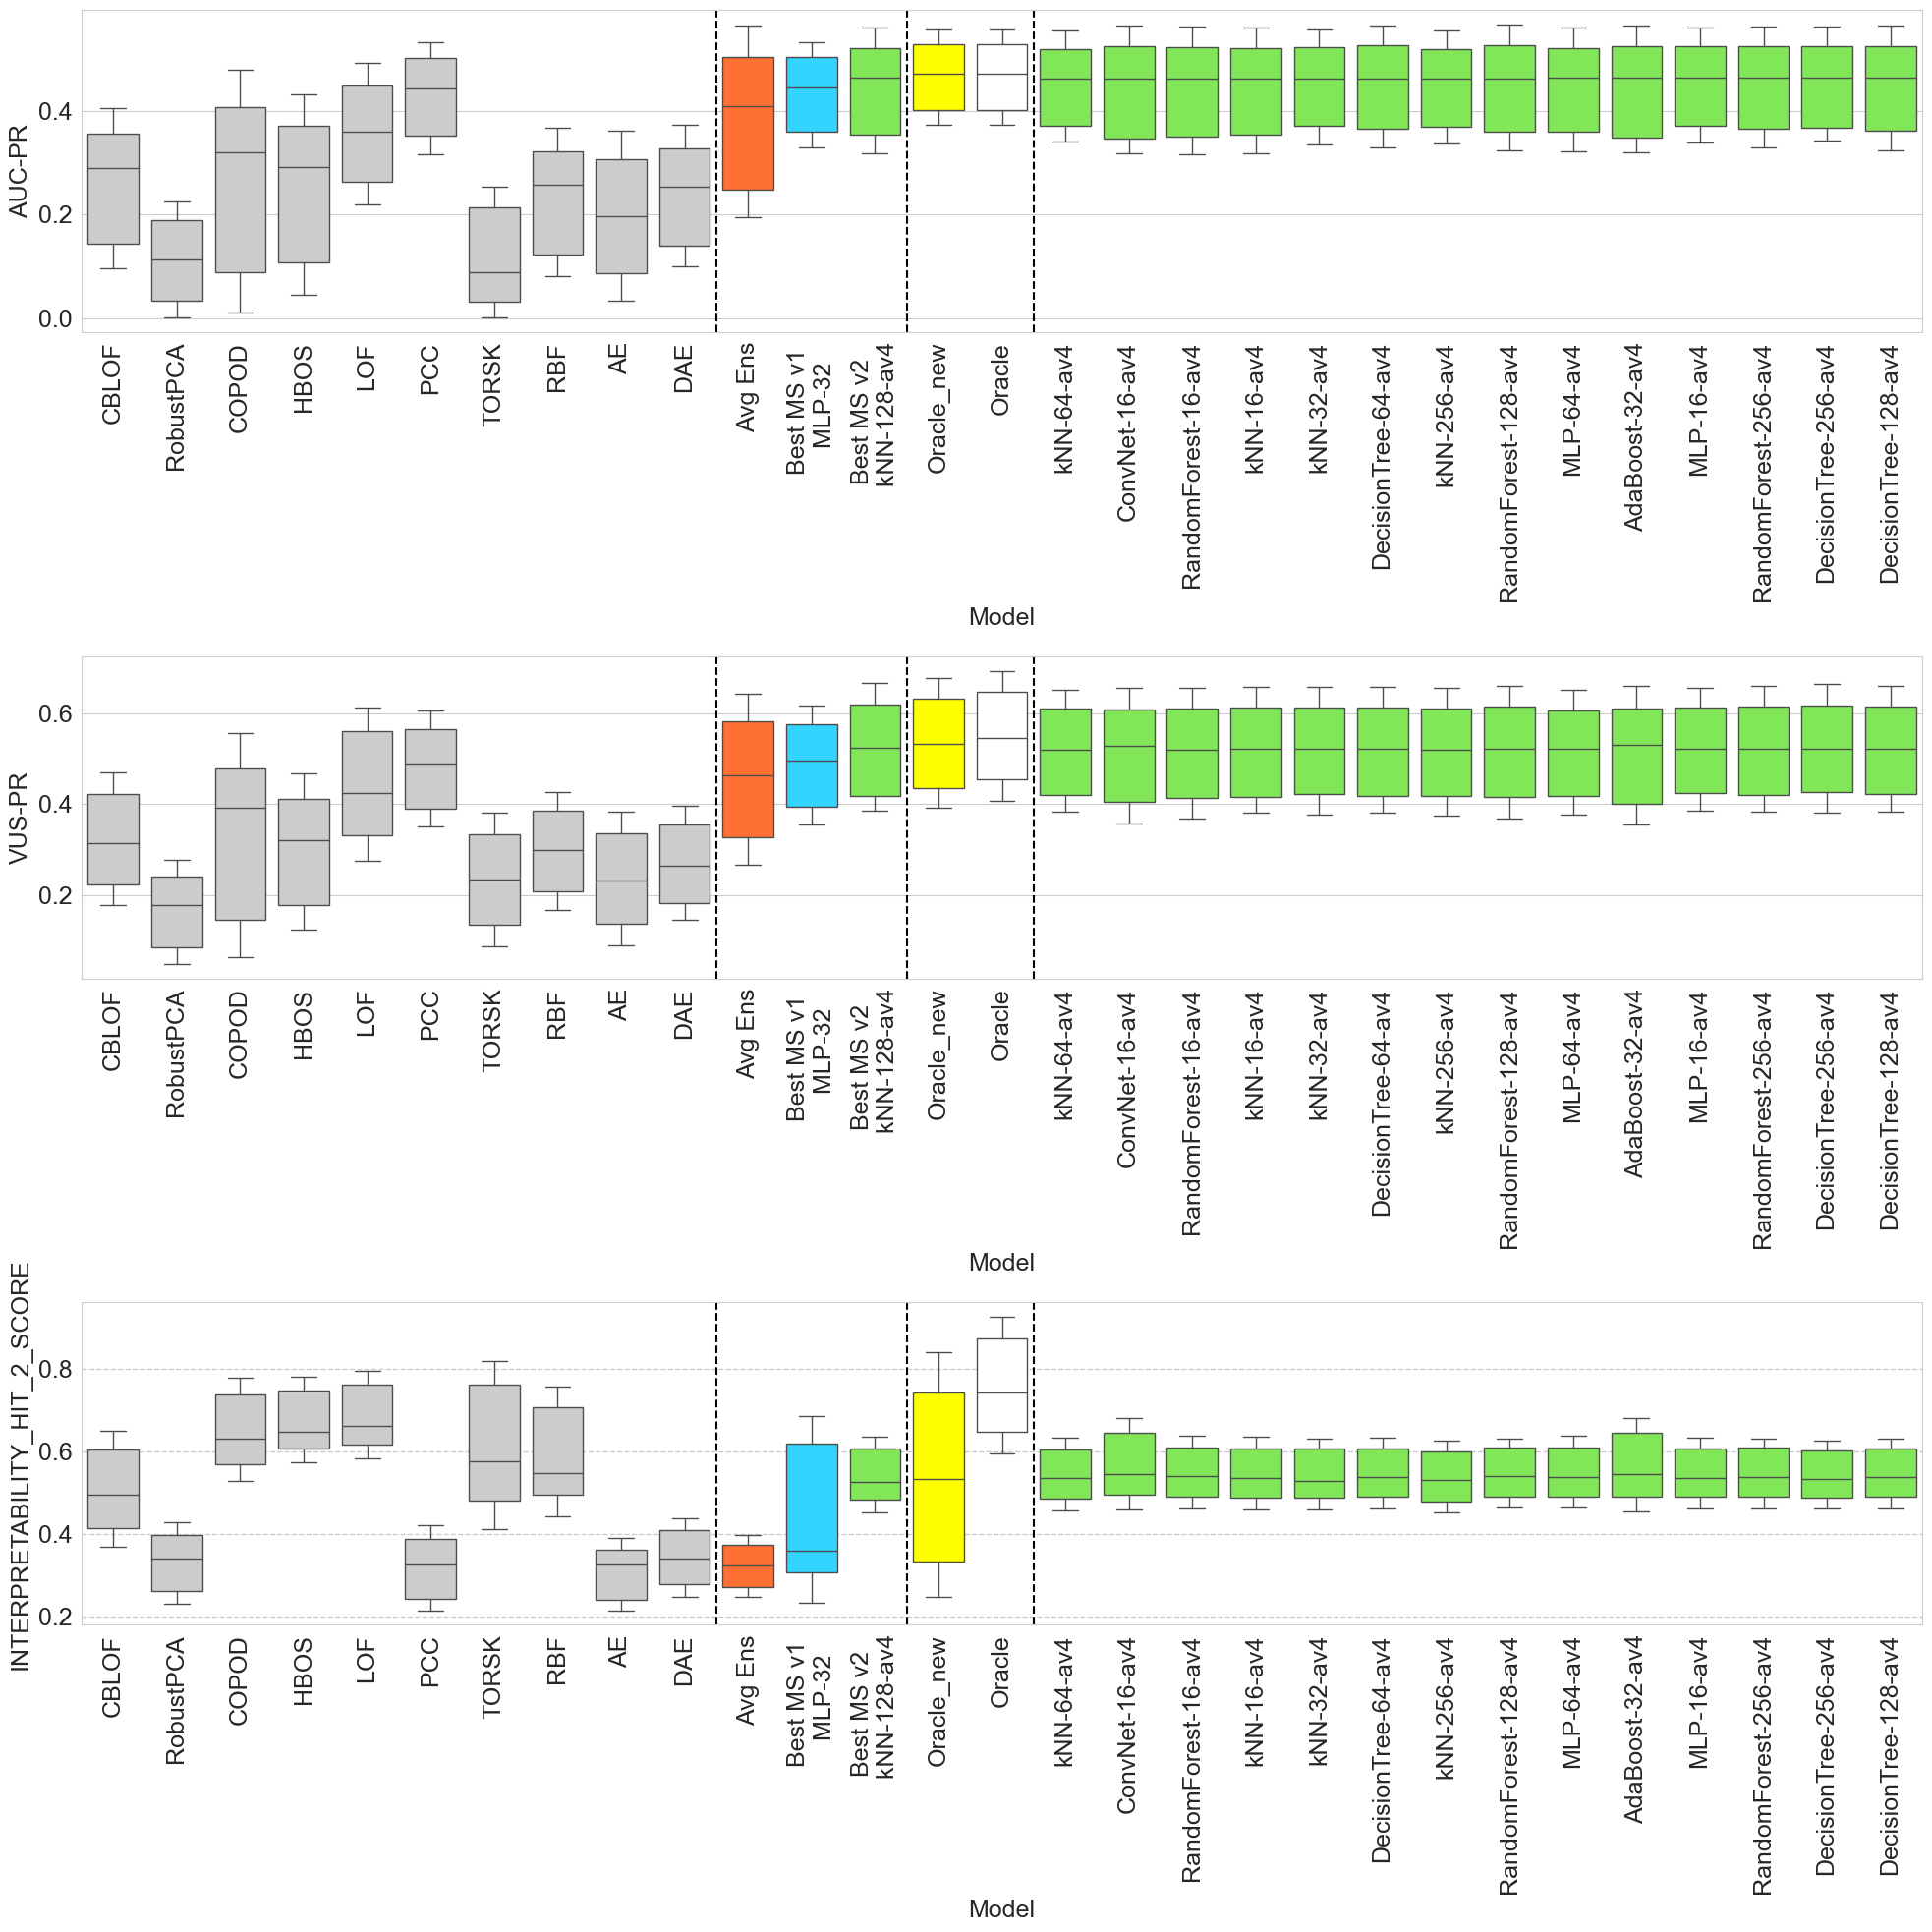

In [50]:
from matplotlib import pyplot as plt

print(measure_names)
def plot_result_boxplot_dataset(combined_df, measure_names=measure_names):
    print(combined_df.columns)
    plt.rcParams.update({'font.size': 18})
    # if len(measure_names) == 1:
    #     figure = plt.figure(figsize=(20, 10))
    # else:
    figure, axes = plt.subplots(len(measure_names), 1,figsize=(20, 20))
    plt.grid(color='k', linestyle='--', linewidth=1, alpha=0.2)
    
    
    # model_selectors_rest = [c for c in df.columns if c not in model_selectors and c not in ['dataset', 'filename', measure_name]]    
    # Distinguish the models within the final df
    # ms_models = [x for x in df['Model'].unique() if any([y in x for y in model_selectors])]
    # msad_models = [x for x in ms_models if x.endswith('vote_1')]
    # msade_models = [x for x in ms_models if x not in msad_models]
    # rest_models = [x for x in df['Model'].unique() if not any([y in x for y in model_selectors])]

    
    # Calculate the mean performance for each Model Selector (MS)
    # method_means = df[[x for x in all_methods_ens if x in df.columns]].mean()
    best_vus_pr_v2 = None
    best_vus_pr_v2_list = None
    best_vus_pr_v1 = None
    for measure_name in measure_names:
        method_meansv1 = combined_df[combined_df['Model'].isin(model_selectors_v1)].groupby('Model')[measure_name].median().sort_values()
        best_ms = method_meansv1.idxmax() # Best MS may differ since results are may slightly vary (although distributions are solid)
        print(f'Best MS v1 indices:', best_ms)
        # method_means_combine = combined_df.groupby('Model')[measure_name].mean()
        # print('Mean combine shape', method_means_combine.shape)
        top_N = 15
        method_means_msadv2 = combined_df[combined_df['Model'].isin(model_selectors_v2_not_v1)].groupby('Model')[measure_name].median().sort_values()
        selected_best_ms_combine = np.argpartition(method_means_msadv2.values, -top_N)[-top_N:].tolist()
        best_ms_v2 = method_means_msadv2.index[selected_best_ms_combine[-1]]
        print('selected_best_ms_combine indices:', selected_best_ms_combine)
        print('best_ms_v2 index:', best_ms_v2)
        selected_best_ms_combine_raw_names = method_means_msadv2.index[selected_best_ms_combine].tolist()
        print(f'names of selected best combine methods:', selected_best_ms_combine_raw_names )
        print(f'Best MS v2 name:', best_ms_v2)
        
        if measure_name == 'AUC_PR':
            best_vus_pr_v1 = best_ms
            best_vus_pr_v2 = best_ms_v2
            best_vus_pr_v2_list = selected_best_ms_combine_raw_names
        if measure_name == 'INTERPRETABILITY_HIT_2_SCORE' or measure_name == 'VUS_PR':
            best_ms_v2 = best_vus_pr_v2
            best_ms = best_vus_pr_v1
            selected_best_ms_combine_raw_names = best_vus_pr_v2_list
        
        # best_ms_combine = method_means_combine.idxmax()
    #     best_ms = 'resnet_1024' # Best model selector at the time publishing of our paper 
        print(f"Best Model Selector (MS) is: {final_names[best_ms]}")
        print(f"Best Model Selector (MS) is: {final_names[best_ms_v2]}")
        selected_best_ms_combine_fix_names = [final_names[f] for f in selected_best_ms_combine_raw_names]
        print(f"Best Combined Detector Method is: {selected_best_ms_combine_fix_names}")
        
        # old_method_order = ['OCSVM','POLY','LSTM','CNN','HBOS','PCA','IFOREST','AE','LOF','IFOREST1','MP','NORMA']
        # old_method_order = ['CBLOF','RobustPCA','COPOD','HBOS','LOF','PCC','AutoEncoder (AE)','DenoisingAutoEncoder (DAE)','Torsk', 'Random Black Forest (RR)']
        my_pal = {method: methods_colors["detectors"] for method in detector_names}
        combine_pal = {method: methods_colors["best_ms_combine"] for method in model_selectors}
        my_pal = {**my_pal, **combine_pal, **{"Avg Ens": methods_colors["avg_ens"], best_ms: methods_colors["best_ms"], 'Oracle': methods_colors["oracle"], 'Oracle_new': methods_colors["oracle_new"] }}
        
        tmp_methods = (detector_names + ['Avg Ens', best_ms,  best_ms_v2, 'Oracle_new', 'Oracle'] + 
                       selected_best_ms_combine_raw_names[:-1])  # Exclude best_ms_v2 since it's already added
        axis = axes[measure_names.index(measure_name)]
        bplot = sns.boxplot(ax=axis, data=combined_df, y=measure_name, x='Model',palette=my_pal, showfliers = False, saturation=1, whis=0.241289844, hue="Model", order=tmp_methods)
        
        xticks_labels = []
        for x in tmp_methods:
            if x != best_ms and x!= best_ms_v2:
                xticks_labels.append(final_names[x])
            elif x == best_ms:
                xticks_labels.append(final_names['best_ms'].format(final_names[best_ms]))
            else:
                xticks_labels.append(final_names['best_ms_v2'].format(final_names[best_ms_v2]))
        
        axis.set_xticks(list(range(len(xticks_labels))), xticks_labels, rotation=90)
        axis.set_ylabel(final_names[measure_name])
    
        axis.axvline(9.5, color='black', linestyle='--')
        axis.axvline(12.5, color='black', linestyle='--')
        axis.axvline(14.5, color='black', linestyle='--')
    plt.tight_layout()
    #     plt.savefig(figure_path.format('1_intro_fig_1'), transparent=True)
    figure_path = f'result_label_by_{mts_current_metric_for_optimization}'
    figure.savefig(figure_path)
    plt.show()
    plt.close()
    
plot_result_boxplot_dataset(combined_df, measure_names)

['Oracle_new', 'Oracle', 'knn_128_average_4', 'decision_tree_128_average_4', 'decision_tree_256_average_4', 'random_forest_256_average_4', 'mlp_16_average_4', 'ada_boost_32_average_4', 'mlp_64_average_4', 'random_forest_128_average_4']


/var/folders/5j/s9hphkqj409f3hqysls2hfzh0000gn/T/ipykernel_825/3373800789.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(new_yticks_labels)


['Oracle', 'Oracle_new', 'inception_time_default_64_average_4', 'ada_boost_32_average_4', 'ada_boost_64_average_4', 'convnet_default_16_average_4', 'convnet_default_16_average_3', 'knn_128_average_4', 'inception_time_default_64_average_3', 'ada_boost_16_average_4']


/var/folders/5j/s9hphkqj409f3hqysls2hfzh0000gn/T/ipykernel_825/3373800789.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(new_yticks_labels)


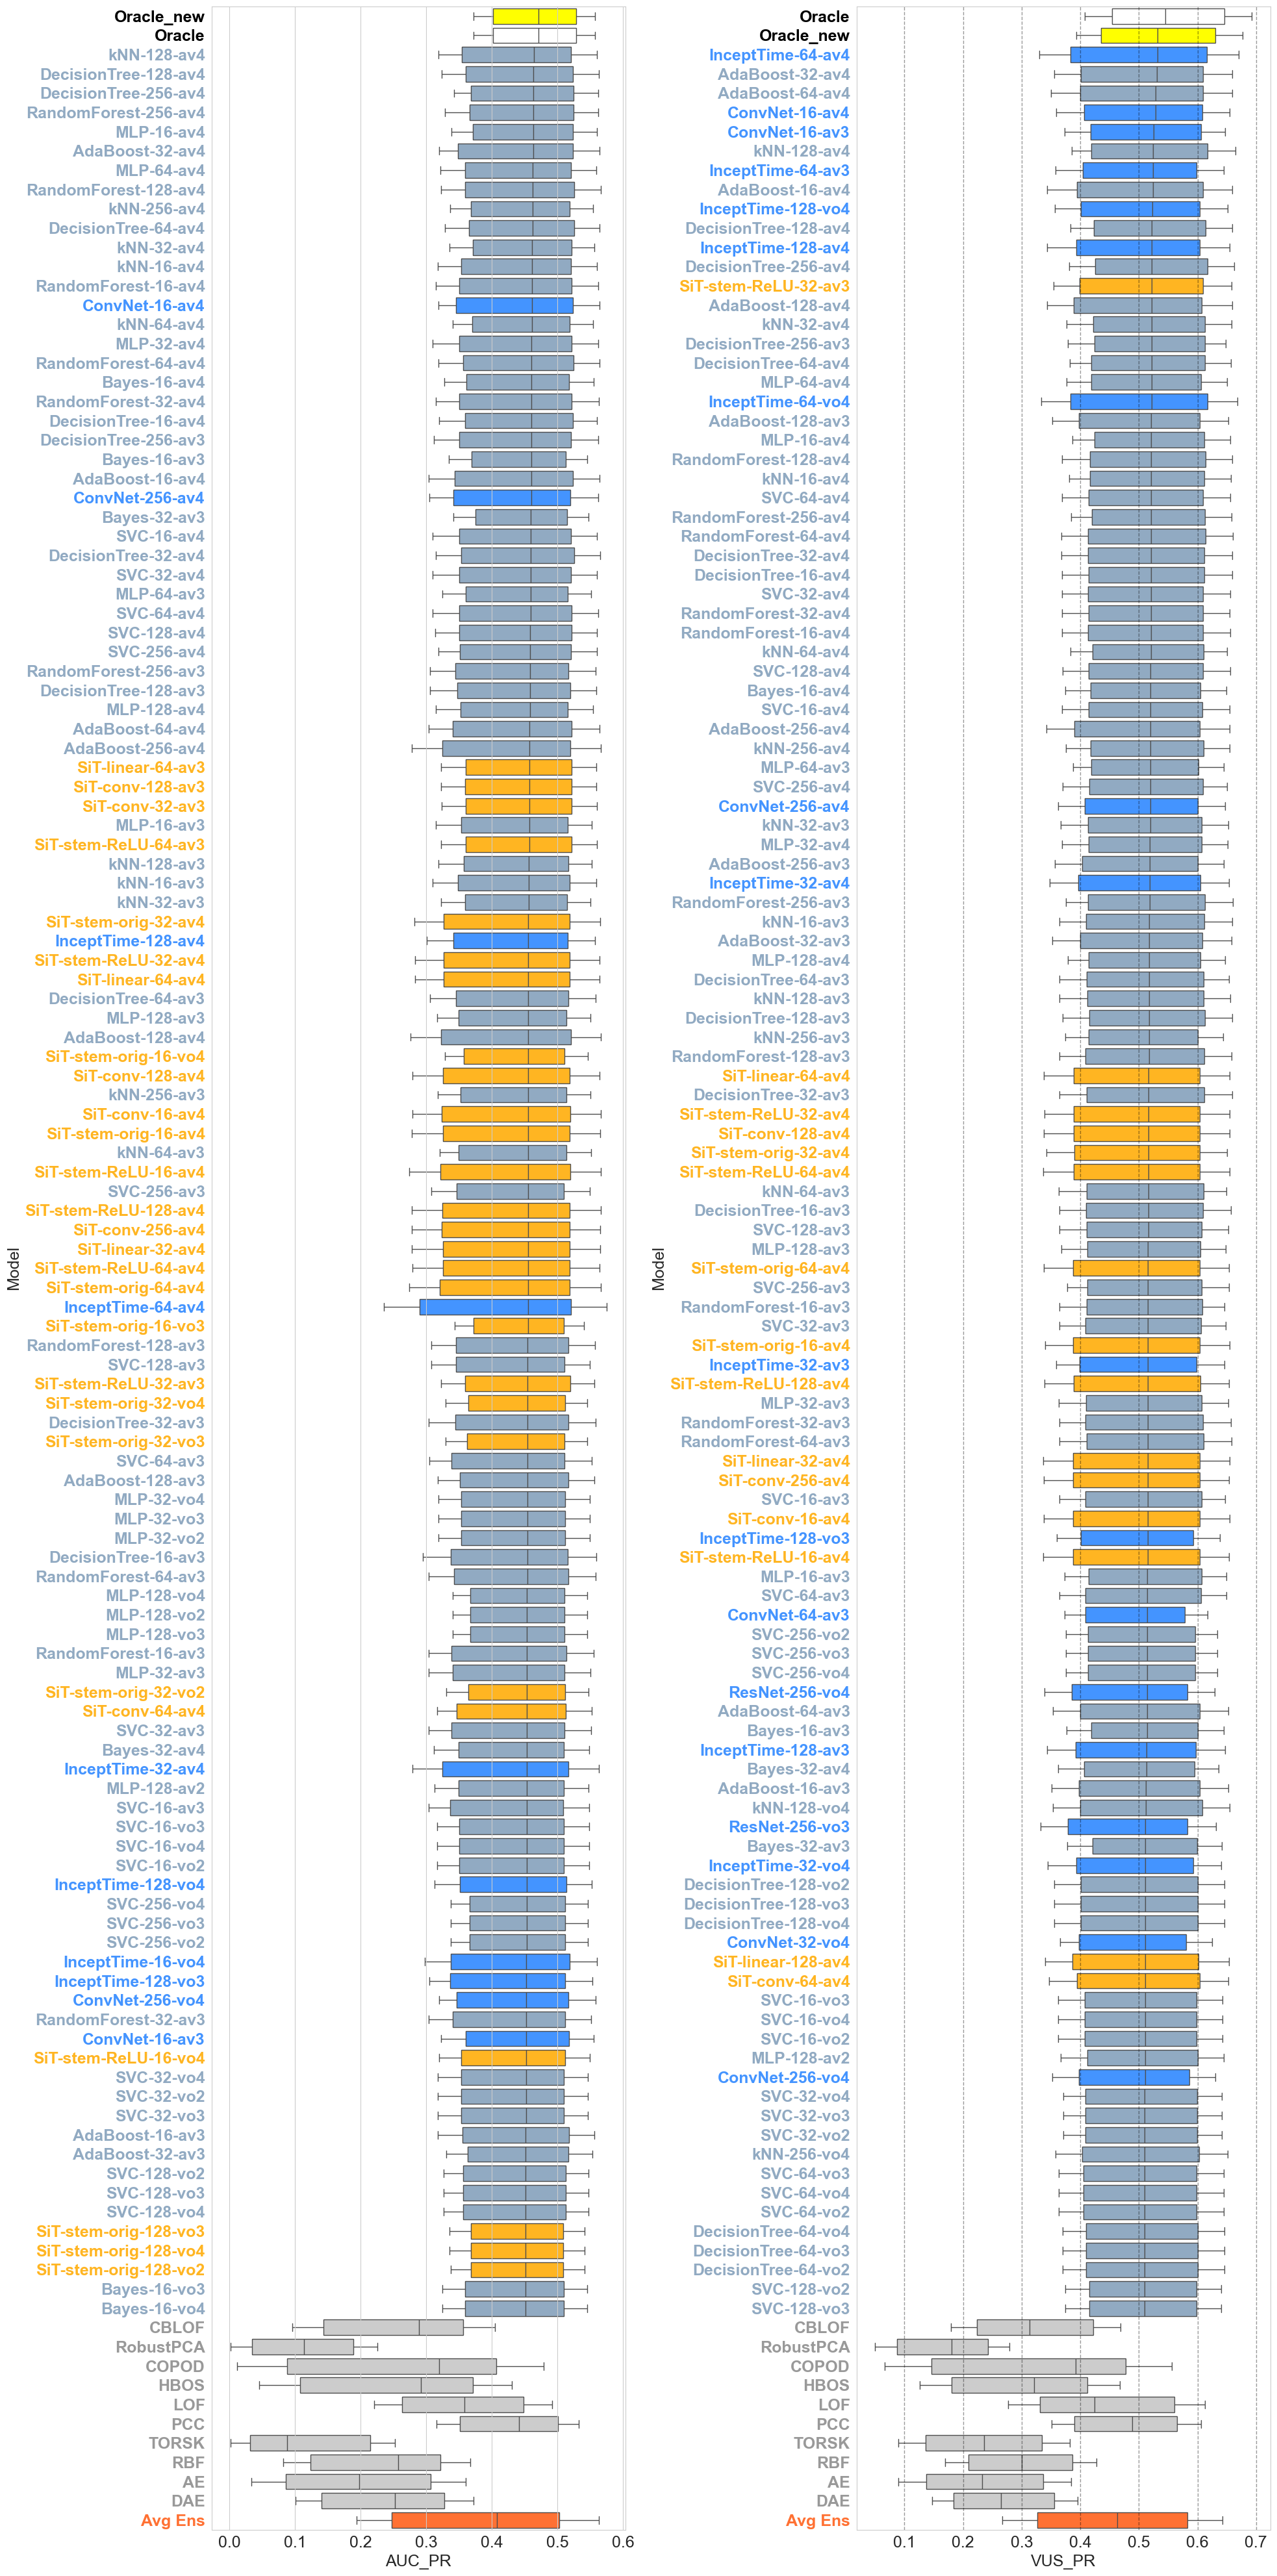

In [44]:
plt.rcParams.update({'font.size': 18})
# plt.figure(figsize=(20, 40))
figure, axes = plt.subplots(1,len(measure_names)-1,figsize=(20, 40))
plt.grid(color='k', linestyle='--', linewidth=1, alpha=0.4)

# print(measure_names),
# measure_name = 'AUC_PR'
for measure_name in measure_names[:-1]:
    ax = axes[measure_names.index(measure_name)]
    order = list(combined_df.groupby('Model')[measure_name].median().sort_values().index)[::-1]
    print(order[:10])
    # order = list(df[all_methods].median().sort_values().index)[:20]
    
    my_pal = {method: methods_colors["detectors"] for method in detector_names}
    for family, color in zip([methods_conv, methods_sit, methods_ts, methods_feature],
                             [methods_colors["conv"], methods_colors["sit"], methods_colors["rocket"], methods_colors["feature_based"]]):
        for length in all_length:
            my_pal_tmp = {method.format(length):color for method in family}
            my_pal = {**my_pal, **my_pal_tmp}
            
    # for family, color in zip([methods_conv_combine, methods_sit_combine, methods_ts_combine, methods_feature_combine],
    #                          [methods_colors['best_ms_combine'], methods_colors['best_ms_combine'] ,methods_colors['best_ms_combine'] ,methods_colors['best_ms_combine']]):
    for family, color in zip([methods_conv_combine, methods_sit_combine, methods_ts_combine, methods_feature_combine],
                             [methods_colors["conv"], methods_colors["sit"], methods_colors["rocket"], methods_colors["feature_based"]]):
        for length in all_length:
            for strategy in ['vote', 'average']:
                for k in [1,2,3,4]:
                    my_pal_tmp = {method.format(length, strategy, k):color for method in family}
                    my_pal = {**my_pal, **my_pal_tmp}
    my_pal = {**my_pal,**{"Avg Ens": methods_colors["avg_ens"], 'Oracle': methods_colors["oracle"], 
                          'Oracle_new': methods_colors["oracle_new"]}}
    
    # Crete boxplot and stripplot
    showed_model_selectors = order[:120]
    # showed_model_selectors = sorted(model_selectors_v1 + model_selectors_v1_in_v2)
    for detector in detector_names:
        if detector not in showed_model_selectors:
            showed_model_selectors.append(detector)
    if 'Avg Ens' not in showed_model_selectors:
        showed_model_selectors.append('Avg Ens')
    sns.boxplot(ax=ax, data=combined_df,x=measure_name, y='Model', hue='Model', palette=my_pal, order=showed_model_selectors, saturation=1, whis=0.241289844, showfliers=False) # 1std = 0.241289844, 2std = 0.982579689
    ax.set_axisbelow(False)
    
    for tick_label in ax.get_yticklabels():
        tick_label.set_weight('bold')
        if 'sit_' in tick_label.get_text():
            tick_label.set_color(methods_colors["sit"])
        elif ('convnet_' in tick_label.get_text()) or ('resnet_' in tick_label.get_text()) or ('inception_' in tick_label.get_text()):
            tick_label.set_color(methods_colors["conv"])
        elif 'rocket_' in tick_label.get_text():
            tick_label.set_color(methods_colors["rocket"])
        elif ('Oracle' in tick_label.get_text()):
            tick_label.set_color("black")
        elif ('Avg Ens' in tick_label.get_text()):
            tick_label.set_color(methods_colors["avg_ens"])
        elif '_'not  in tick_label.get_text():
            tick_label.set_color("#999999")
        else:
            tick_label.set_color(methods_colors["feature_based"])
    
    # Change xtick labels to camera-ready names
    new_yticks_labels = []
    for i, tick_label in enumerate(ax.get_yticklabels()):
        method_name = tick_label.get_text()
        if method_name in final_names:
            # print('Method name:', method_name, '->', final_names[method_name])
            tick_label.set_text(final_names[method_name])
        else:
            # print('Method name:', method_name)
            tick_label.set_text(method_name)
        new_yticks_labels.append(tick_label)
    ax.set_yticklabels(new_yticks_labels)

# plt.xticks(rotation=90)
# plt.yticks(rotation=90)
# plt.ylabel(final_names[measure_name])

plt.tight_layout()
# plt.savefig(figure_path.format('5_overall_results_full_1'))
plt.show()
plt.close()

['Oracle', 'Oracle_new', 'inception_time_default_64_average_4', 'ada_boost_32_average_4', 'ada_boost_64_average_4', 'convnet_default_16_average_4', 'convnet_default_16_average_3', 'knn_128_average_4', 'inception_time_default_64_average_3', 'ada_boost_16_average_4']


/var/folders/5j/s9hphkqj409f3hqysls2hfzh0000gn/T/ipykernel_825/3765970204.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(new_yticks_labels)


['Oracle', 'knn_16_vote_1', 'LOF', 'mlp_256', 'knn_16', 'rocket_256_vote_4', 'rocket_256_vote_3', 'mlp_256_vote_1', 'rocket_256_vote_2', 'rocket_256_vote_1']


/var/folders/5j/s9hphkqj409f3hqysls2hfzh0000gn/T/ipykernel_825/3765970204.py:72: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(new_yticks_labels)


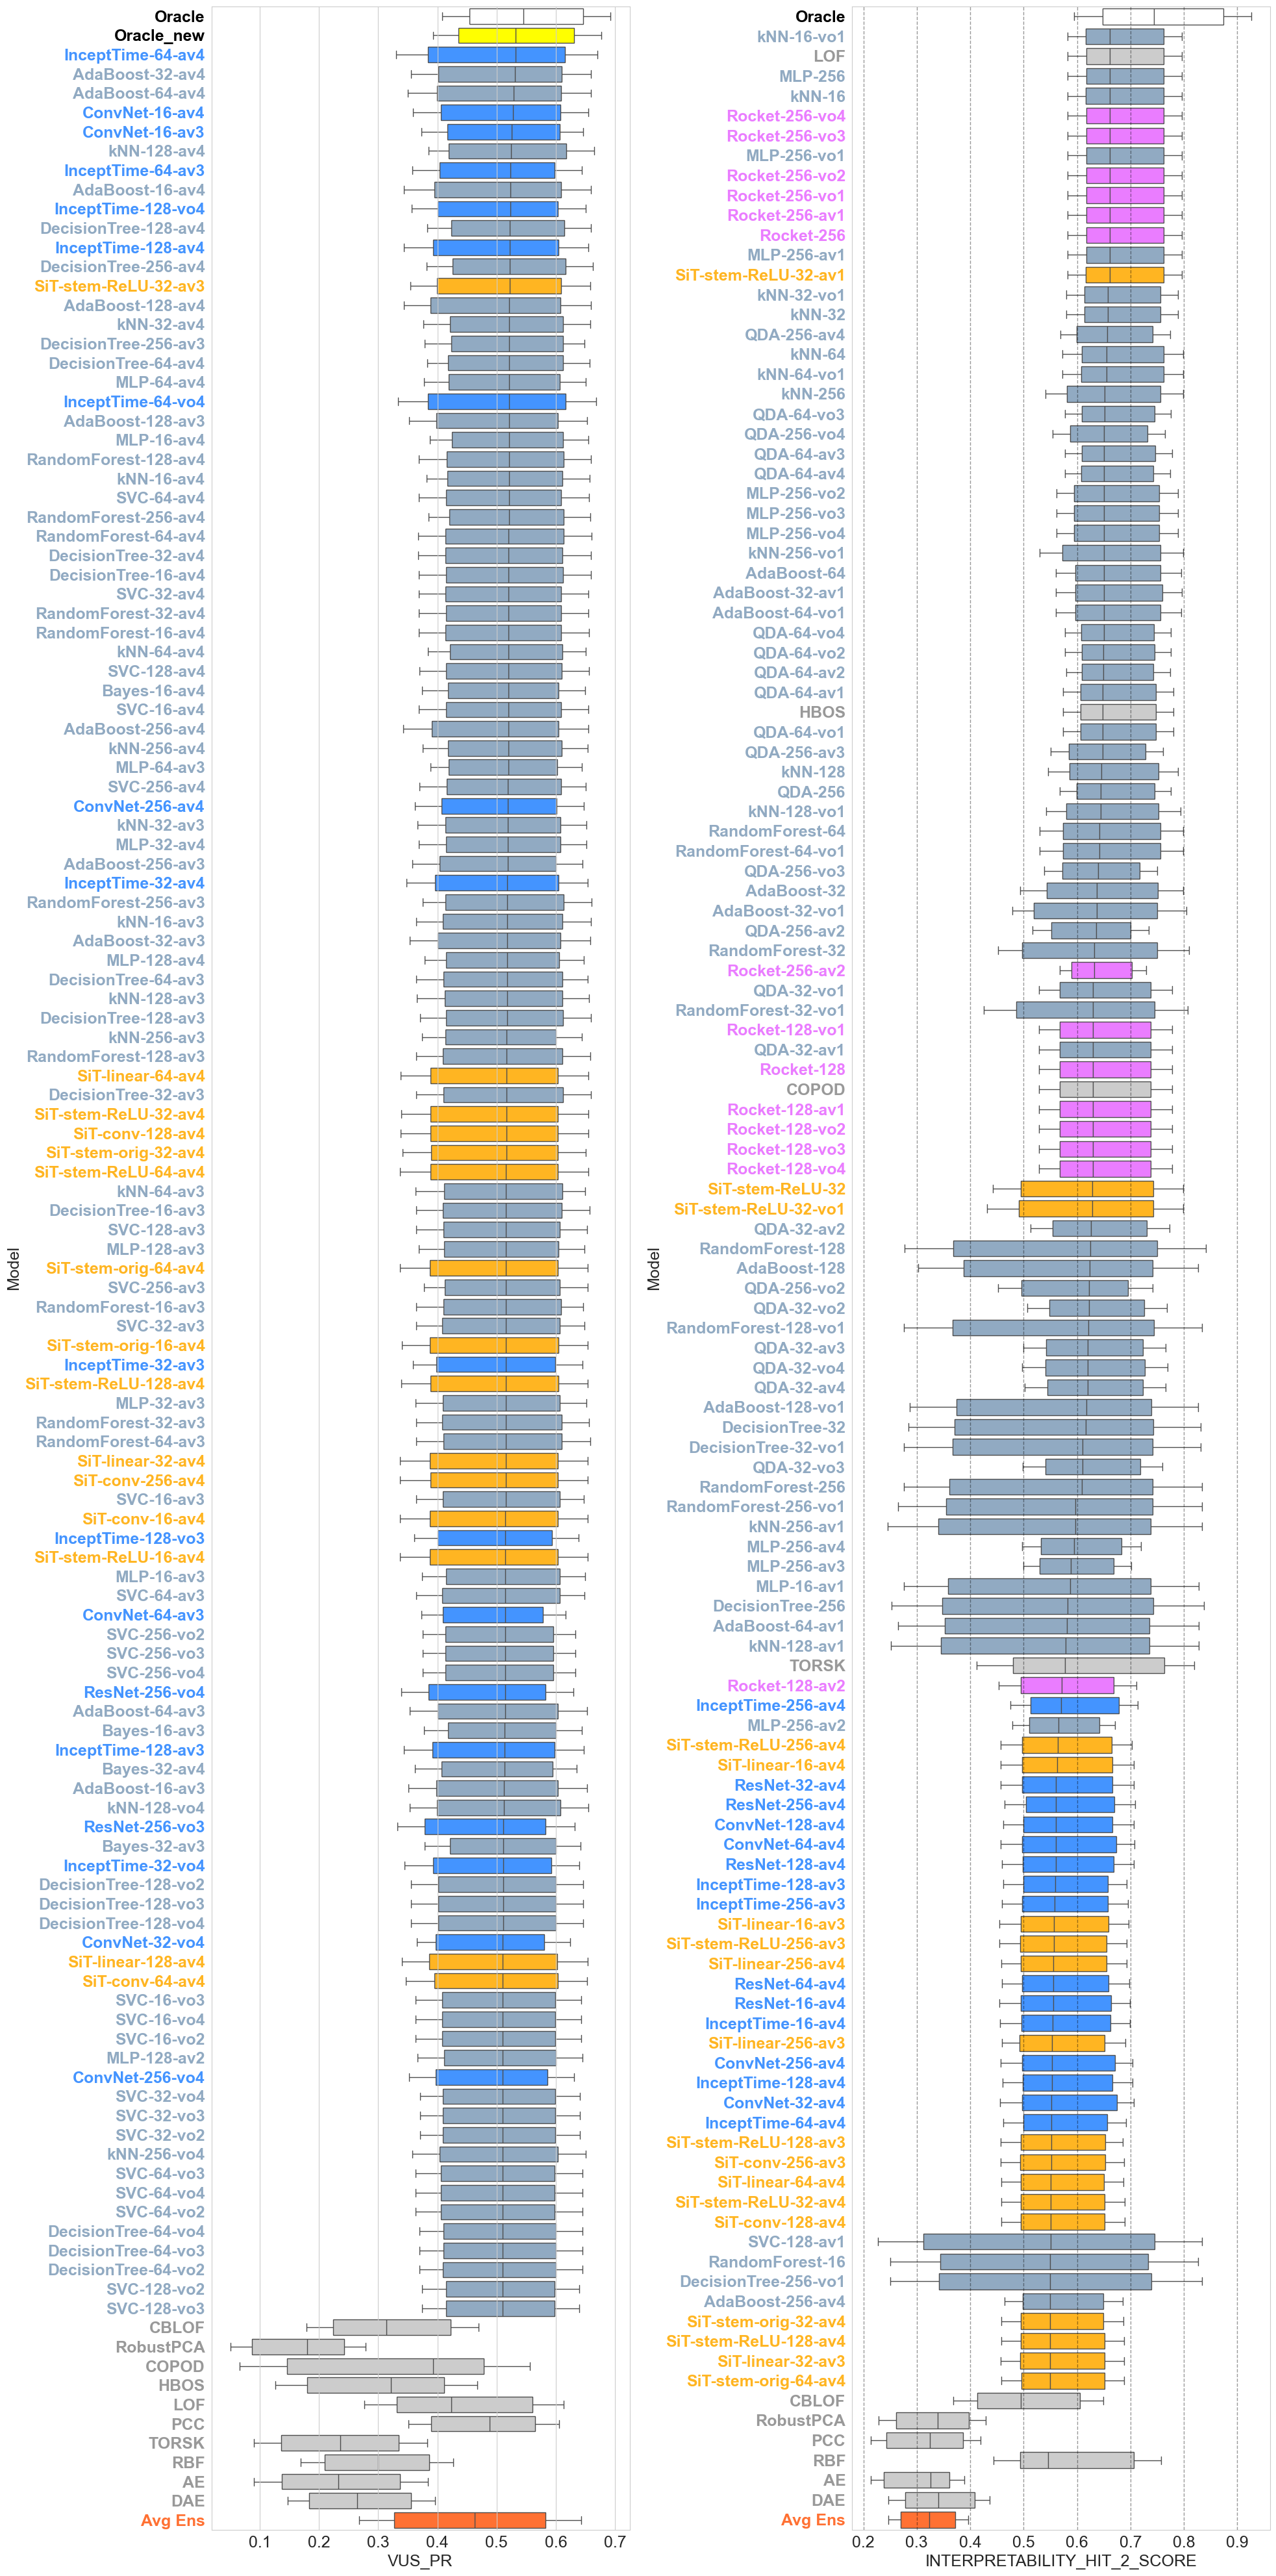

In [46]:
plt.rcParams.update({'font.size': 18})
# plt.figure(figsize=(20, 40))
figure, axes = plt.subplots(1,len(measure_names)-1,figsize=(20, 40))
plt.grid(color='k', linestyle='--', linewidth=1, alpha=0.4)

# print(measure_names),
# measure_name = 'AUC_PR'
for measure_name in measure_names[1:]:
    ax = axes[measure_names[1:].index(measure_name)]
    order = list(combined_df.groupby('Model')[measure_name].median().sort_values().index)[::-1]
    print(order[:10])
    # order = list(df[all_methods].median().sort_values().index)[:20]
    
    my_pal = {method: methods_colors["detectors"] for method in detector_names}
    for family, color in zip([methods_conv, methods_sit, methods_ts, methods_feature],
                             [methods_colors["conv"], methods_colors["sit"], methods_colors["rocket"], methods_colors["feature_based"]]):
        for length in all_length:
            my_pal_tmp = {method.format(length):color for method in family}
            my_pal = {**my_pal, **my_pal_tmp}
            
    # for family, color in zip([methods_conv_combine, methods_sit_combine, methods_ts_combine, methods_feature_combine],
    #                          [methods_colors['best_ms_combine'], methods_colors['best_ms_combine'] ,methods_colors['best_ms_combine'] ,methods_colors['best_ms_combine']]):
    for family, color in zip([methods_conv_combine, methods_sit_combine, methods_ts_combine, methods_feature_combine],
                             [methods_colors["conv"], methods_colors["sit"], methods_colors["rocket"], methods_colors["feature_based"]]):
        for length in all_length:
            for strategy in ['vote', 'average']:
                for k in [1,2,3,4]:
                    my_pal_tmp = {method.format(length, strategy, k):color for method in family}
                    my_pal = {**my_pal, **my_pal_tmp}
    my_pal = {**my_pal,**{"Avg Ens": methods_colors["avg_ens"], 'Oracle': methods_colors["oracle"],
                          'Oracle_new': methods_colors["oracle_new"]}}
    
    # Crete boxplot and stripplot
    showed_model_selectors = order[:120]
    # showed_model_selectors = sorted(model_selectors_v1 + model_selectors_v1_in_v2)
    for detector in detector_names:
        if detector not in showed_model_selectors:
            showed_model_selectors.append(detector)
    if 'Avg Ens' not in showed_model_selectors:
        showed_model_selectors.append('Avg Ens')
    sns.boxplot(ax=ax, data=combined_df,x=measure_name, y='Model', hue='Model', palette=my_pal, order=showed_model_selectors, saturation=1, whis=0.241289844, showfliers=False) # 1std = 0.241289844, 2std = 0.982579689
    ax.set_axisbelow(False)
    
    for tick_label in ax.get_yticklabels():
        tick_label.set_weight('bold')
        if 'sit_' in tick_label.get_text():
            tick_label.set_color(methods_colors["sit"])
        elif ('convnet_' in tick_label.get_text()) or ('resnet_' in tick_label.get_text()) or ('inception_' in tick_label.get_text()):
            tick_label.set_color(methods_colors["conv"])
        elif 'rocket_' in tick_label.get_text():
            tick_label.set_color(methods_colors["rocket"])
        elif ('Oracle' in tick_label.get_text()):
            tick_label.set_color("black")
        elif ('Avg Ens' in tick_label.get_text()):
            tick_label.set_color(methods_colors["avg_ens"])
        elif '_'not  in tick_label.get_text():
            tick_label.set_color("#999999")
        else:
            tick_label.set_color(methods_colors["feature_based"])
    
    # Change xtick labels to camera-ready names
    new_yticks_labels = []
    for i, tick_label in enumerate(ax.get_yticklabels()):
        method_name = tick_label.get_text()
        if method_name in final_names:
            # print('Method name:', method_name, '->', final_names[method_name])
            tick_label.set_text(final_names[method_name])
        else:
            # print('Method name:', method_name)
            tick_label.set_text(method_name)
        new_yticks_labels.append(tick_label)
    ax.set_yticklabels(new_yticks_labels)

# plt.xticks(rotation=90)
# plt.yticks(rotation=90)
# plt.ylabel(final_names[measure_name])

plt.tight_layout()
# plt.savefig(figure_path.format('5_overall_results_full_1'))
plt.show()
plt.close()

In [60]:
print(set([f[:-3] for f in df['Model Selector'].unique()]))

KeyError: 'Model Selector'

In [7]:
2712/8

339.0

In [14]:
5*(1+3+4)

40

In [315]:
import os

detectors = []

scores_path = '/Users/macbook/PycharmProjects/MuMSAD_interpretability/3-MSAD/data/mts/settings_five/scores'

for dataset in os.listdir(scores_path):
	curr_detectors = []
	for name in os.listdir(os.path.join(scores_path, dataset)):
		curr_detectors.append(name)
	if len(detectors) < 1:
		detectors = curr_detectors.copy()
	elif not detectors == curr_detectors:
		raise ValueError('detectors are not the same in this dataset \'{}\''.format(dataset))
detectors.sort()
detectors

['AutoEncoder (AE)',
 'CBLOF',
 'COPOD',
 'DenoisingAutoEncoder (DAE)',
 'HBOS',
 'LOF',
 'PCC',
 'Random Black Forest (RR)',
 'RobustPCA',
 'Torsk']

['CBLOF',
 'RobustPCA',
 'COPOD',
 'HBOS',
 'LOF',
 'PCC',
 'Torsk',
 'Random Black Forest (RR)',
 'AutoEncoder (AE)',
 'DenoisingAutoEncoder (DAE)']

In [63]:
# from tqdm import tqdm
# from utils.utils import combine_anomaly_scores
# from utils.scores_loader import ScoresLoader
# 
# combine_results_dir = '/Users/macbook/PycharmProjects/MuMSAD_interpretability/3-MSAD/results_mts/combine_detectors/settings_five'
# scores_path = '/Users/macbook/PycharmProjects/MuMSAD_interpretability/3-MSAD/data/mts/settings_five/scores'
# 
# scoreloader = ScoresLoader(scores_path)
# right_orded_weighted_columns = [f'weight_{f}' for f in multivariate_detector_names]
# fnames_for_loading_scores = pd.read_csv('/Users/macbook/PycharmProjects/MuMSAD_interpretability/3-MSAD/results_mts/combine_detectors/settings_five/ada_boost_16_average_1.csv', index_col=0).index.tolist()
# scores, idx_failed = scoreloader.load(fnames_for_loading_scores)
# print(idx_failed)
# print(f'Scores shape: {scores[0].shape}')
# univarate_labels_dict, univariate_label_idx_failed = scoreloader.load_univariate_labels(fnames_for_loading_scores)
# print(univariate_label_idx_failed)
# def check_order_file_names(fnames, right_fnames):
#     return all([f1 == f2 for f1, f2 in zip(fnames, right_fnames)])
# for file in tqdm(os.listdir(combine_results_dir), desc='Processing combine results files', total=len(os.listdir(combine_results_dir))):
#     if file.endswith('.csv') and 'merged_combine_detectors_results' not in file:
#         # print(file)
#         df = pd.read_csv(os.path.join(combine_results_dir, file), index_col=0)
#         assert check_order_file_names(df.index.tolist(), fnames_for_loading_scores), (f'File names are not in the '
#                                                                                       f'right order in file {file}')
#         weighted_columns = [col for col in df.columns if 'weight_' in col]
#         assert len(weighted_columns) == 10, f'Number of weighted columns {len(weighted_columns)} does not match 10 in file {file}'
#         weights = df[[col for col in df.columns if 'weight_' in col]].values
#         weighted_scores = combine_anomaly_scores(scores, weights, plot=False)
#         print(f'New anomaly scores length: {len(weighted_scores)}')
#         metric_values_dict = {}
#         # for index, fname in enumerate(fnames_for_loading_scores):
#         for metric_name in ['auc_pr', 'vus_pr']:
#             metric_values = scoreloader.compute_metric(univarate_labels_dict.values(), weighted_scores,
#                                                    metric=metric_name, n_jobs=8)
#             metric_values_dict[metric_name] = metric_values
#         df['AUC_PR'] = metric_values_dict['auc_pr']
#         df['VUS_PR'] = metric_values_dict['vus_pr']
#         # righted_weighted_columns = [f'weight_{f}' for f in multivariate_detector_names]
#         # rename_dict = {old: new for old, new in zip(weighted_columns, righted_weighted_columns)}
#         # df.rename(rename_dict, axis=1, inplace=True)
#         df.to_csv(os.path.join(combine_results_dir, file))
#         print(f'Updated file saved: {file}')
#         # for x, y in zip(weighted_columns, right_orded_weighted_columns):
#         #     assert x == y, f'Column {x} does not match {y}'
# # total_weighted_columns

In [422]:
right_orded_weighted_columns = [f'weight_{f}' for f in multivariate_detector_names]
for file in os.listdir(combine_results_dir)[1:]:
    if file.endswith('.csv'):
        # print(file)
        df = pd.read_csv(os.path.join(combine_results_dir, file), index_col=0)
        weighted_columns = [col for col in df.columns if 'weight_' in col]
        # righted_weighted_columns = [f'weight_{f}' for f in multivariate_detector_names]
        # rename_dict = {old: new for old, new in zip(weighted_columns, righted_weighted_columns)}
        # df.rename(rename_dict, axis=1, inplace=True)
        # df.to_csv(os.path.join(combine_results_dir, file))
        for x, y in zip(weighted_columns, right_orded_weighted_columns):
            assert x == y, f'Column {x} does not match {y}'
# total_weighted_columns

NameError: name 'scoreloader' is not defined